
# Project: Investigate a Dataset - [Amazon_product_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limit">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


#### Dataset Overview
<ul>
<li>This dataset contains information about 10,000 movies collected from the Movie Database (TMDb).</li>
<li>The dataset includes user ratings and revenue information for each movie.</li>
<li>Certain columns, such as 'cast' and 'genres', contain multiple values separated by pipe (|) characters. These columns likely list the cast and genres associated with each movie.</li>
<li>The 'cast' column may contain odd characters, and it's mentioned that there is no need to clean them.</li>
</ul>

#### Columns in the Dataset:
1. `product_id`: A unique identifier for each product.
2. `product_name`: Name of the Product.
3. `category`: Category of the Product.
4. `discounted_price`: Discounted Price of the Product.
5. `actual_price`: Actual Price of the Product.
6. `discount_percentage`: Percentage of Discount for the Product.
7. `rating`: Rating of the Product.
8. `rating_count`: Number of people who voted for the Amazon rating.
9. `about_product`: Description about the Product.
10. `user_id`: ID of the user who wrote review for the Product.
11. `user_name`: Name of the user who wrote review for the Product.
12. `review_id`: ID of the user review.
13. `review_title`: Short review.
14. `review_content`: Long review.
15. `img_link`: Image Link of the Product.
16. `product_link`: Official Website Link of the Product

<a id='question'></a>
## Question(s) for Analysis
1. Is there a relationship between discount percentage and average product rating ?
2. Do products with more reviews have higher or lower average ratings?
3. Do higher-priced products receive better ratings than lower-priced ones?
4. Do Products with Positive Sentiment in Reviews Have Higher Ratings?
5. Which Categories of Products Receive the Highest or Lowest Ratings?

In [1]:
# import numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import nltk
from scipy import stats
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.1

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# load datasets from tmdb-movies.csv file
df = pd.read_csv("data/amazon.csv")

In [4]:
#Create a temp dataset named df2
df2 = df.copy()

In [5]:
# view the first 5 rows of the dataset
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
#view dimensions of dataset
df.shape

(1465, 16)

The number of samples in the dataset is 1465, The number of columns in the dataset is 16

In [7]:
#explore the dataset, checking for the missing value of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

There is no null data in this dataset.

In [8]:
#view the datatype of each column
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [9]:
#Show how many unique values are there in each columns.
df.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

In [10]:
#check whether the dataset has duplicated row
sum(df.duplicated())

0

There is 0 duplicate row in the dataset

In [11]:
#show the null rows in each column
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [12]:
#view the overall information of the dataset:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [13]:
df.rating.value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

`Rating` column has 1 row that contain '|' symbol

In [14]:
df2[df2['rating'] =='|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...



### Data Cleaning
 

### Drop extraneous columns
Columns to Drop: `img_link` , `user_name` , `user_id`

In [15]:
#drop columns from the dataset
df.drop(['img_link','user_name','user_id'], inplace=True, axis=1)

In [16]:
#confirm the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   review_id            1465 non-null   object
 10  review_title         1465 non-null   object
 11  review_content       1465 non-null   object
 12  product_link         1465 non-null   object
dtypes: object(13)
memory usage: 148.9+ KB


### Dedupe Data

In [17]:
#print number of duplicates to confirm dedupe - should be 0
print(df.duplicated().sum())

0


### Drop Rows with Missing Values

In [18]:
# view missing value count for each property
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
review_id              0
review_title           0
review_content         0
product_link           0
dtype: int64

In [19]:
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://www.amazon.in/REDTECH-Lightning-Certif...


I go to product link to check and notice that product_id: B0B94JPY2N has 4.0 rating and 58 rating_count. 
Product_id B0BQRJ3C47 hasn't existed in amazon so I will drop it.

In [20]:
df[df['rating_count'].isnull()].product_link

282    https://www.amazon.in/Amazon-Brand-Charging-Su...
324    https://www.amazon.in/REDTECH-Lightning-Certif...
Name: product_link, dtype: object

In [21]:
df.loc[df['product_id'] == 'B0B94JPY2N', 'rating_count'] = '58'
df.loc[df['product_id'] == 'B0B94JPY2N', 'rating'] = '4.0'

In [22]:
#drop rows with any null values in dataset
df.dropna(inplace=True)

In [23]:
# checks if any of columns in the dataset have null values - should print False
df.isnull().sum().any()

False

In [24]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
review_id              0
review_title           0
review_content         0
product_link           0
dtype: int64

### Change Data Type

Create a float_change function to automatically change float type to each column.

In [25]:
def float_change(df,column_name):
    # removes any non-numeric characters (except for the decimal point)
    df[column_name] = df[column_name].str.replace(r'[^0-9.]', '', regex=True)
    
    # convert string to float for actual_price column
    df[column_name] = df[column_name].astype(float)

In [26]:
float_change(df,'discounted_price')

In [27]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price            object
discount_percentage     object
rating                  object
rating_count            object
about_product           object
review_id               object
review_title            object
review_content          object
product_link            object
dtype: object

In [28]:
# convert string to float for actual_price column
float_change(df,'actual_price')

In [29]:
# check data type for revenue column and budget column
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                  object
rating_count            object
about_product           object
review_id               object
review_title            object
review_content          object
product_link            object
dtype: object

In [30]:
float_change(df,"rating_count")

In [31]:
# check data type for revenue column and budget column
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                  object
rating_count           float64
about_product           object
review_id               object
review_title            object
review_content          object
product_link            object
dtype: object

### Fixing `rating` Column

In [32]:
df[df['rating'] =='|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16%,|,992.0,No Installation is provided for this product|1...,"R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


I checked the product_linke of "B08L12N5H1", the rating is 3.9, so I will fill the rating at 3.9

In [33]:
df.loc[df['product_id'] == 'B08L12N5H1', 'rating'] = '3.9'

In [34]:
float_change(df,"rating")

In [35]:
# check data type for revenue column and budget column
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                 float64
rating_count           float64
about_product           object
review_id               object
review_title            object
review_content          object
product_link            object
dtype: object

### Fixing `discount_percentage` Column

In [36]:
float_change(df,"discount_percentage")

In [37]:
df['discount_percentage'] = df['discount_percentage'].apply(lambda x: x/100)

In [38]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://www.amazon.in/Portronics-Konnect-POR-1...


In [39]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
review_id              0
review_title           0
review_content         0
product_link           0
dtype: int64

Create a split_and_expand function to automatically split and expand into separate rows.

In [40]:
# Create and split_and_expand function to automatically split and expand into separate rows.
def split_and_expand(df,column_name,fill_value='NaN'):
    #split the specified column on the delimiter '|'
    split_column = df[column_name].str.split('|')
    
    # Get only the first and last elements from the split
    first_last = pd.DataFrame({
        'category': split_column.apply(lambda x: x[0] if len(x) > 0 else fill_value),
        'product_type': split_column.apply(lambda x: x[-1] if len(x) > 1 else fill_value)
    })
    
    #drop the old column
    df = df.drop(column_name, axis=1)
    
    #join the new column
    df= df.join(first_last)
    
    return df

### Fixing `category` Column

Call split_and_expand function to fix genres columns

In [41]:
#Call split_and_expand function and put it in new dataframe called df_genres
split_category_df = split_and_expand(df, 'category')

In [42]:
split_category_df.shape

(1464, 14)

In [43]:
#Confirm the new genre column
split_category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   discounted_price     1464 non-null   float64
 3   actual_price         1464 non-null   float64
 4   discount_percentage  1464 non-null   float64
 5   rating               1464 non-null   float64
 6   rating_count         1464 non-null   float64
 7   about_product        1464 non-null   object 
 8   review_id            1464 non-null   object 
 9   review_title         1464 non-null   object 
 10  review_content       1464 non-null   object 
 11  product_link         1464 non-null   object 
 12  category             1464 non-null   object 
 13  product_type         1464 non-null   object 
dtypes: float64(5), object(9)
memory usage: 203.9+ KB


In [44]:
split_category_df.head(100)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,product_link,category,product_type
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,USBCables
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B093QCY6YJ,ZEBRONICS ZEB-USB150WF1 WiFi USB Mini Adapter ...,290.0,349.0,0.17,3.7,1977.0,Supports 150Mbps Wireless data transmission ra...,"R32XZQTB1BP0J8,R2NHRHTL743ZMA,R10FKRAEORI9L,RE...","Good product,Best produced,Working well as of ...","Working very nice ok,Sahi paise ke hisab se sa...",https://www.amazon.in/ZEBRONICS-ZEB-USB150WF1-...,Computers&Accessories,WirelessUSBAdapters
96,B093ZNQZ2Y,LOHAYA Remote Compatible for Mi Smart LED TV 4...,249.0,799.0,0.69,3.8,1079.0,Compatible with MI Smart TV 4A 32 inch LED TV ...,"R1MTTFP4GWHWC8,R2A03DS956BN4T,R21TRTA1VGGCD3,R...","Very hard to use,Good,Required Replacement but...","Not value for money.. not satisfied,Good,Requi...",https://www.amazon.in/LOHAYA-Remote-Compatible...,Electronics,RemoteControls
97,B08LKS3LSP,"Gilary Multi Charging Cable, 3 in 1 Nylon Brai...",345.0,999.0,0.65,3.7,1097.0,The cable comes with 3 Different pins allowing...,"R168J8VQSY0OH5,R18LTVF8A76SR3,RVRLO0A6SRBIU,R3...","Product is nice,Decent cable,It charges all th...","Product is nice,Decent charging cable for the...",https://www.amazon.in/Gilary-Charging-Braided-...,Computers&Accessories,USBCables
98,B00V4BGDKU,TP-Link UE300 USB 3.0 to RJ45 Gigabit Ethernet...,1099.0,1899.0,0.42,4.5,22420.0,Fastest USB 3.0 and Gigabit solution ensure hi...,"R30SWI8U6K7PDR,R2K3WL7JFGLDI,R2WXWZRPAKQ1GP,R2...","Easy to use,Working fine - but errors while us...","Good looking amd working fine.,I brought this ...",https://www.amazon.in/TP-Link-TL-UE300-Gigabit...,Computers&Accessories,WirelessUSBAdapters


## Sentiment Analysis

Function to get sentiment

In [45]:
# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    
    # returns a polarity score between -1 (negative) and 1 (positive)
    return analysis.sentiment.polarity

In [46]:
# Applying sentiment analysis on the 'review_content' column
split_category_df['textblob_sentiment_score'] = split_category_df['review_content'].apply(get_sentiment)

In [47]:
# Categorizing the sentiment as Positive, Neutral, or Negative
split_category_df['text_blob_sentiment'] = split_category_df['textblob_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [48]:
split_category_df['text_blob_sentiment'].value_counts()

Positive    1437
Negative      26
Neutral        1
Name: text_blob_sentiment, dtype: int64

In [49]:
# Download VADER lexicon (only the first time)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/haucongle/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [50]:
# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [51]:
# Function to get sentiment
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']  # compound score between -1 (negative) and 1 (positive)

In [52]:
# Applying sentiment analysis
split_category_df['vader_sentiment_score'] = split_category_df['review_content'].apply(get_vader_sentiment)
split_category_df['vader_sentiment'] = split_category_df['vader_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [53]:
split_category_df['vader_sentiment'].value_counts()

Positive    1381
Negative      80
Neutral        3
Name: vader_sentiment, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Is there a relationship between discount percentage and average product rating ?

**Analysis Decision 1**: Bin the discount percentage data

In [54]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
split_category_df['discount_bin'] = pd.cut(split_category_df['discount_percentage'], bins=bins, labels=labels)

**Reasoning**: Provids a simplified distribution and can make comparisons easier.

**Analysis Decision 2**: Draw histogram to describe distribution of discount percentage.

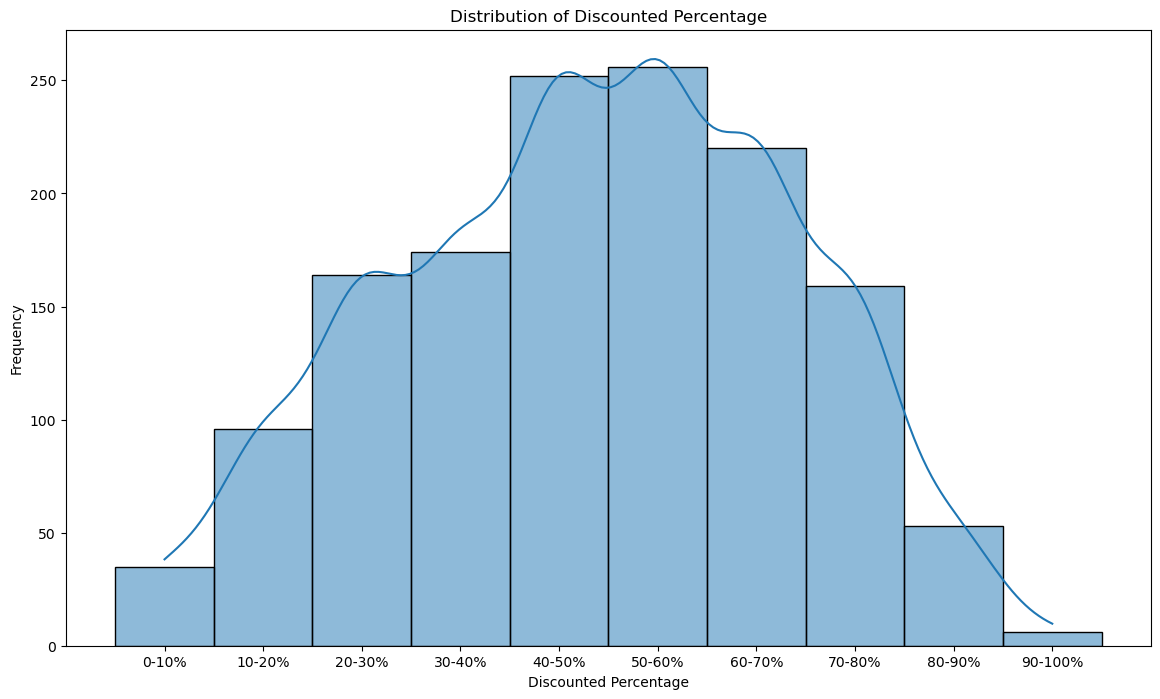

In [55]:
plt.figure(figsize=(14, 8))
sns.histplot(split_category_df['discount_bin'], kde=True)
plt.title('Distribution of Discounted Percentage')
plt.xlabel('Discounted Percentage')
plt.ylabel('Frequency')
plt.show()

**Reasoning**: This histogram plot will help us understand how pricing stategies are distributed and potential impact on consumer behavior and busisness performance.

**Summary**: 
- The peak around 40% to 60% discount.
- Discounts greater than 80% are rare.
- Very few products are offered without any discount.
- Most products are offered with moderate to high discounts, with a few products available at no discount or very high discounts.

**Analysis Decision 3**: Rating

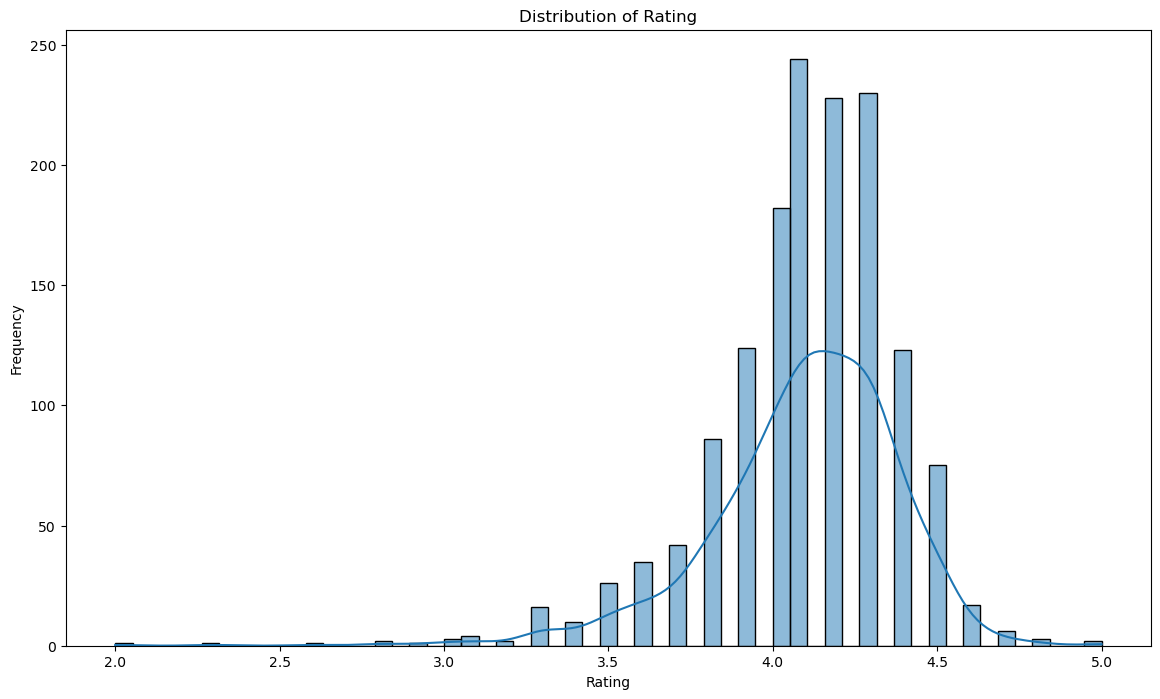

In [56]:
plt.figure(figsize=(14, 8))
sns.histplot(split_category_df['rating'], kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Reasoning**: This histogram plot will help us understand how pricing stategies are distributed and potential impact on consumer behavior and busisness performance.

**Summary**: 
- The majority of ratings seem to cluster betwen 3.5 and 4.5, indicating that most products are rated positively.
- Very few ratings are below 3.0, suggesting that poor ratings are rare in this dataset

In [57]:
#Calculate the correlation number between vote_count and Revenue
split_category_df['discount_percentage'].corr(split_category_df['rating'])

-0.15507651849573378

**Analysis Decision 4**: Relationship between rating and discount percentage

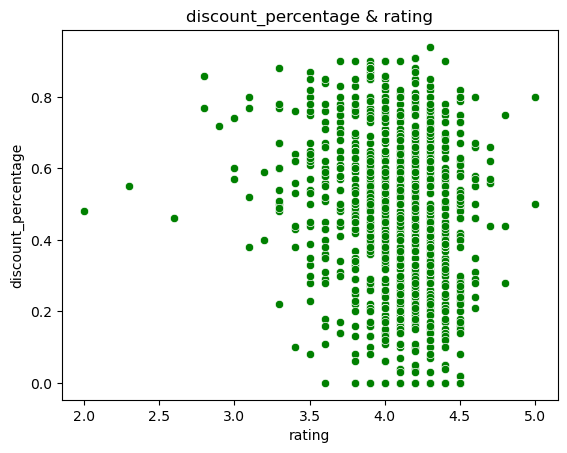

In [58]:
sns.scatterplot(x='rating',y='discount_percentage', data= split_category_df, color = "green")
plt.title("discount_percentage & rating")
plt.show()

**Reasoning**: This scatter plot will help us understand whether higher rating engagement leads to higher discount percentage

**Summary**: Based on the scatter plot and the calculated correlation number result (-0.15507651849573378), it shows the weak negative correlation between discount_percentage and rating, suggesting that discount percentage has a limited impact on rating.

**Analysis Decision 5**: Grouping Rating

**Reasoning**: This grouping gives a meaningful breakdown, because the ratings are mostly concentrated around certain values.

- Low Ratings (1.0 - 3.0): These are rare, but they represent a significant drop in product quality or satisfaction.
- Average Ratings (3.0 - 4.0): This range covers a moderate level of satisfaction.
- Good Ratings (4.0 - 4.5): The largest concentration falls here, representing well-rated products.
- Excellent Ratings (4.5 - 5.0): This would represent top-rated products.

In [59]:
split_category_df['mean_of_ratings'] = pd.cut(df['rating'], [1, 3, 3.5, 4, 5], labels = ['Low', 'Average', 'Good', 'Excellent'])

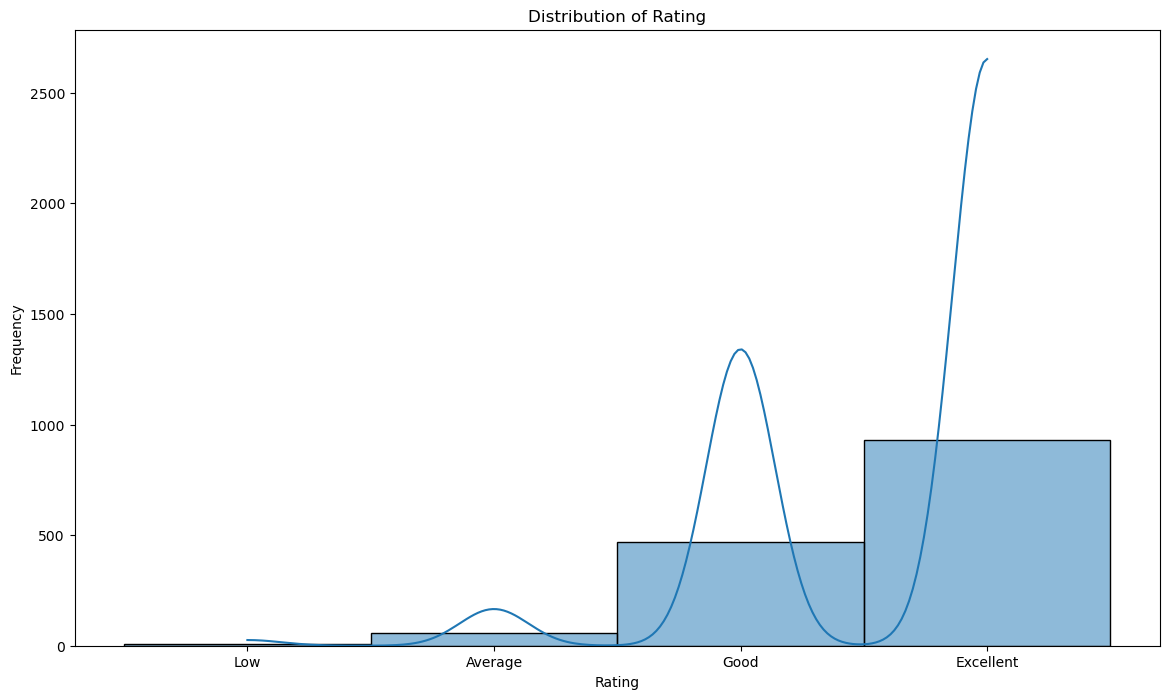

In [60]:
plt.figure(figsize=(14, 8))
sns.histplot(split_category_df['mean_of_ratings'], kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Group by rating categories and calculate the correlation
grouped_by_rating = split_category_df.groupby('mean_of_ratings').apply(
    lambda x: x['discount_percentage'].corr(x['rating'])
)

print(grouped_by_rating)

mean_of_ratings
Low          0.548148
Average     -0.096236
Good        -0.040843
Excellent   -0.056030
dtype: float64


- Low-Rated Products: There is a moderately strong positive correlation for low-rated products. This suggests that products with low ratings are likely to offer higher discounts.
- Average, Good, and Excellent Products: For these categories, the correlation is weakly negative. This suggests that higher discounts are less commonly associated with higher-rated products. In fact, these products are more likely to maintain moderate or lower discount levels, relying on their good ratings to drive sales.

In [62]:
discount_vs_rating = split_category_df.groupby('mean_of_ratings')['discount_percentage'].mean()
print(discount_vs_rating)

mean_of_ratings
Low          0.638889
Average      0.563276
Good         0.507356
Excellent    0.454267
Name: discount_percentage, dtype: float64


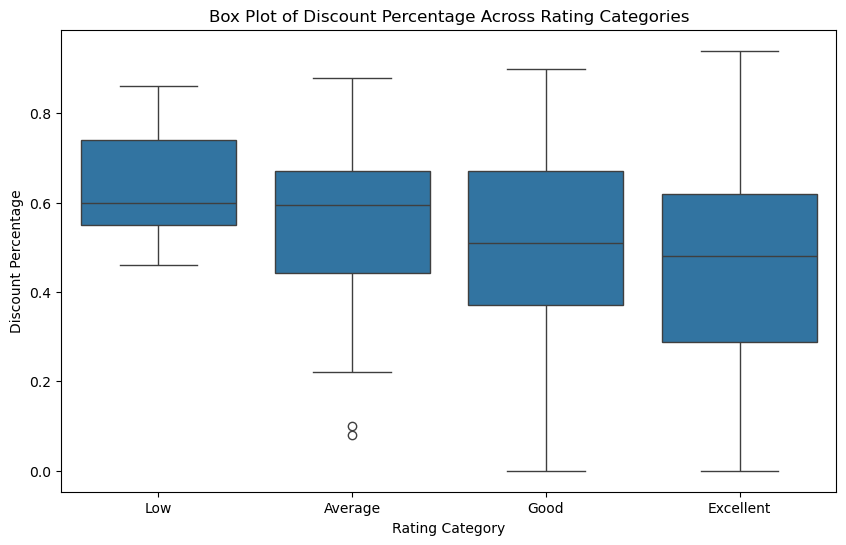

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(x='mean_of_ratings', y='discount_percentage', data=split_category_df)
plt.title('Box Plot of Discount Percentage Across Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Discount Percentage')
plt.show()

The relationship between discount percentage and product ratings is clear:
- Products with lower ratings tend to offer higher discounts.
- Products with higher ratings offer more moderate discounts, leveraging their quality and reputation to drive sales without needing large discounts.

### Research Question 2:  Do products with more reviews have higher or lower average ratings?

**Analysis Decision 1**: Create review count ranges.

In [64]:
split_category_df['rating_count'].describe()

count      1464.000000
mean      18283.084016
std       42741.908537
min           2.000000
25%        1179.000000
50%        5178.500000
75%       17330.750000
max      426973.000000
Name: rating_count, dtype: float64

In [65]:
# Step 1: Define bins for review count ranges
bins = [0, 100, 1000, 5000, 10000, 50000, 100000, 500000]  # Define the review count ranges
labels = ['0-100', '100-1000', '1000-5000', '5000-10000', '10000-50000', '50000-100000', '100000+']  # Label each range

In [66]:
# Create a new column in the DataFrame to represent review count ranges
split_category_df['rating_count_group'] = pd.cut(split_category_df['rating_count'], bins=bins, labels=labels)

**Reasoning**: To ensure that we work with clean dataset by removing out zero revenues and budgets.

**Analysis Decision 2**: Calculate Average Ratings for Each Review Count Group

In [67]:
# Group by the review count ranges and calculate the mean rating
review_count_vs_rating = split_category_df.groupby('rating_count_group')['rating'].mean().reset_index()

In [68]:
# Display the result
print(review_count_vs_rating)

  rating_count_group    rating
0              0-100  3.924658
1           100-1000  4.005906
2          1000-5000  4.092443
3         5000-10000  4.138614
4        10000-50000  4.140662
5       50000-100000  4.195588
6            100000+  4.165957


**Reasoning**: By selecting movies with revenus higher than the average revenue, we can identify movies that have high revenue.

**Analysis Decision 3**: Visualize the Relationship

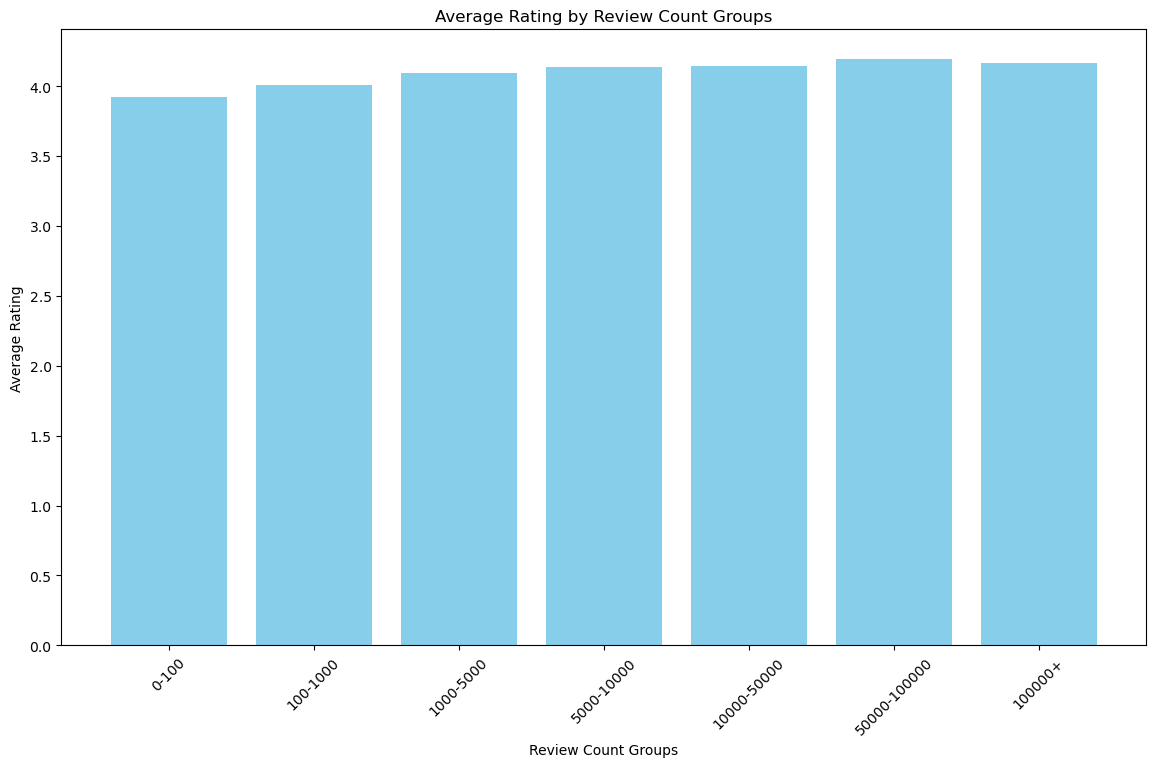

In [69]:
# Plot the relationship between review count groups and average ratings
plt.figure(figsize=(14, 8))
plt.bar(review_count_vs_rating['rating_count_group'], review_count_vs_rating['rating'], color='skyblue')
plt.xlabel('Review Count Groups')
plt.ylabel('Average Rating')
plt.title('Average Rating by Review Count Groups')
plt.xticks(rotation=45)
plt.show()

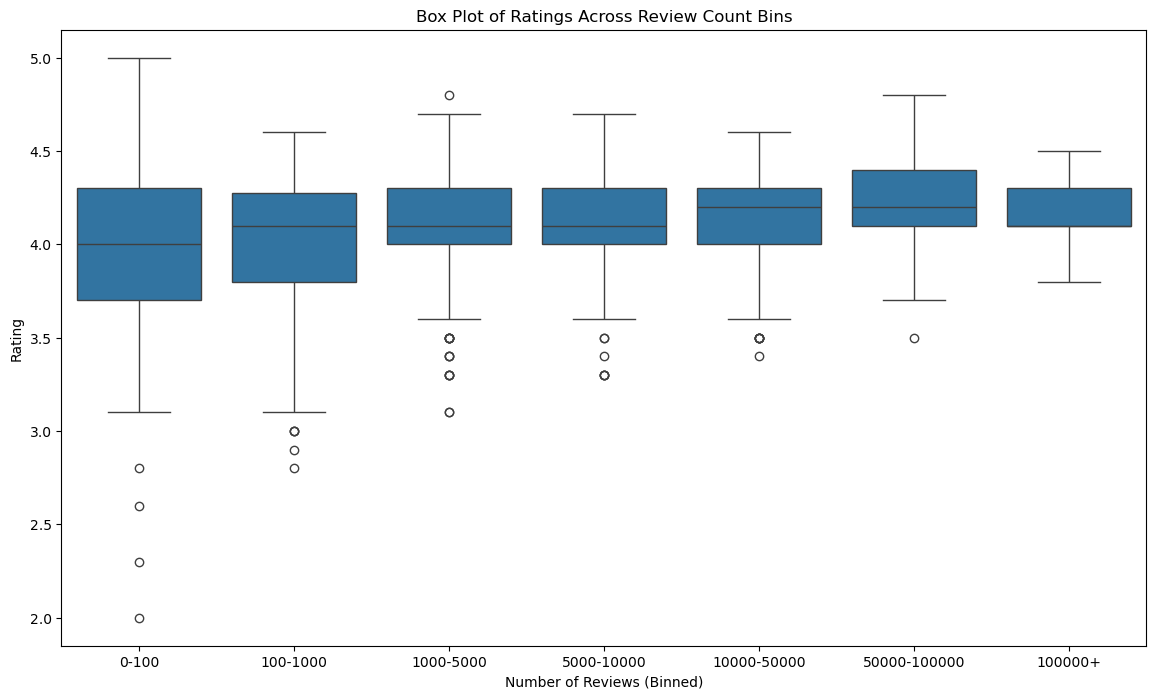

In [70]:
plt.figure(figsize=(14,8))
sns.boxplot(data=split_category_df, x='rating_count_group', y='rating')
plt.title('Box Plot of Ratings Across Review Count Bins')
plt.xlabel('Number of Reviews (Binned)')
plt.ylabel('Rating')
plt.show()

**Reasoning**: the histogram will visualize the distribution of movie revenues.

**Summary**: 
- Products with fewer reviews have more variability in their ratings (the spread is wider then higher review counts).
- Products with moderate to higher reivews are more consistent and positive in their ratings, clustering around 4.0.
- Products have 100.000+ reviews slide downward.
- All data set reamin mostly positive (above 3.5)

**Analysis Decision 4**: Top Directors by Average Revenue

In [71]:
correlation = split_category_df['rating_count'].corr(split_category_df['rating'])
print(f"Correlation between rating_count and rating: {correlation}")

Correlation between rating_count and rating: 0.10248811280168635


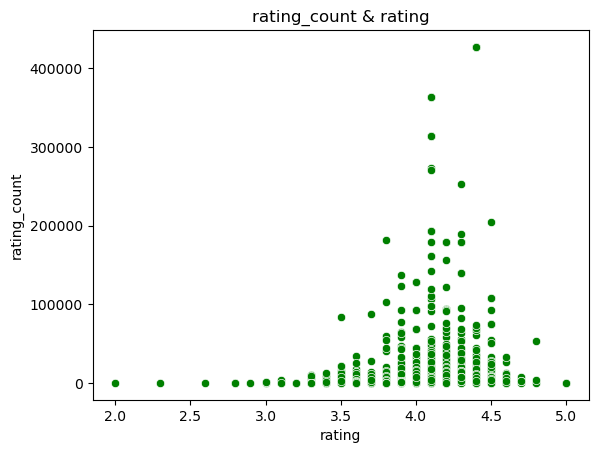

In [72]:
sns.scatterplot(x='rating',y='rating_count', data= split_category_df, color = "green")
plt.title("rating_count & rating")
plt.show()

**Summary**: 
- The correlation value of 0.102 suggests that there is a slight positive relationship between the number of reviews and its rating, but this is very weak.
- products with more reviews tend to have slightly higher ratings but the effect is minimal.

In [73]:
# Group by rating categories and calculate the correlation
grouped_by_rating = split_category_df.groupby('mean_of_ratings').apply(
    lambda x: x['rating_count'].corr(x['rating'])
)

print(grouped_by_rating)

mean_of_ratings
Low          0.604472
Average      0.211206
Good         0.135987
Excellent   -0.065201
dtype: float64


- Low and Average Ratings: Products with lower ratings tend to receive more reviews, likely due to customers being more vocal when they are dissatisfied or when a product has issues. This suggests that negative experiences drive reviews more often.
- Good and Excellent Ratings: For higher-rated products, the correlation weakens and even turns slightly negative. This could mean that products with good or excellent ratings don't need to accumulate as many reviews to maintain their rating, and the number of reviews becomes less impactful on the rating.

In [74]:
review_count_vs_rating = split_category_df.groupby('mean_of_ratings')['rating_count'].mean()
print(review_count_vs_rating)

mean_of_ratings
Low            199.444444
Average       5238.620690
Good         11663.014925
Excellent    22619.446121
Name: rating_count, dtype: float64


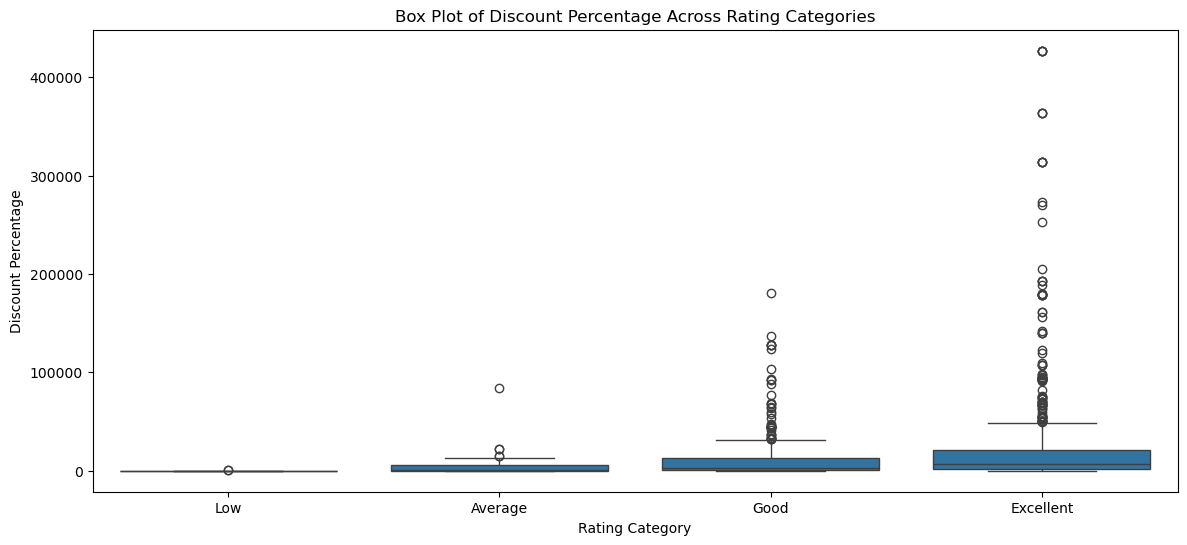

In [75]:
plt.figure(figsize=(14,6))
sns.boxplot(x='mean_of_ratings', y='rating_count', data=split_category_df)
plt.title('Box Plot of Discount Percentage Across Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Discount Percentage')
plt.show()

### Research Question 3:  Do higher-priced products receive better ratings than lower-priced ones?

**Analysis Decision 1**: Create review count ranges.

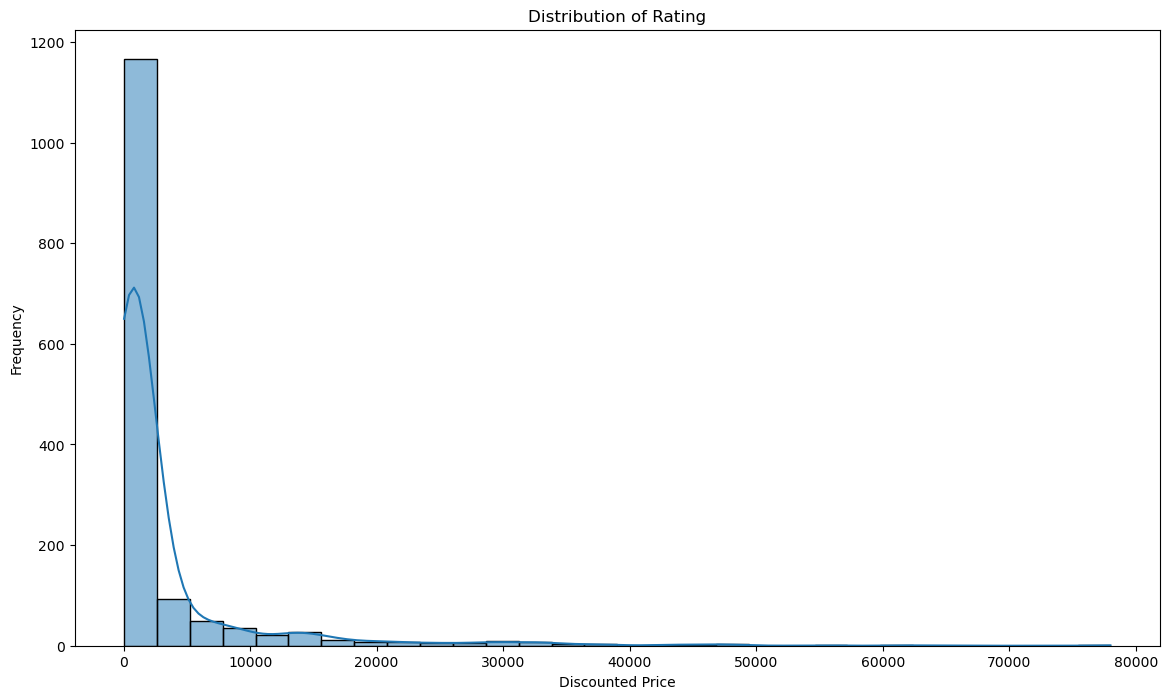

In [76]:
plt.figure(figsize=(14, 8))
sns.histplot(split_category_df['discounted_price'], bins=30, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

**Analysis Decision 2**: Create review count ranges.

In [77]:
# Using the median price to split the products
median_price = split_category_df['discounted_price'].median()
split_category_df['price_category'] = split_category_df['discounted_price'].apply(lambda x: 'Lower-Priced' if x < median_price else 'Higher-Priced')

In [78]:
# Group by price category and calculate the mean rating
price_rating_comparison = split_category_df.groupby('price_category')['rating'].mean()
print(price_rating_comparison)

price_category
Higher-Priced    4.112064
Lower-Priced     4.080362
Name: rating, dtype: float64


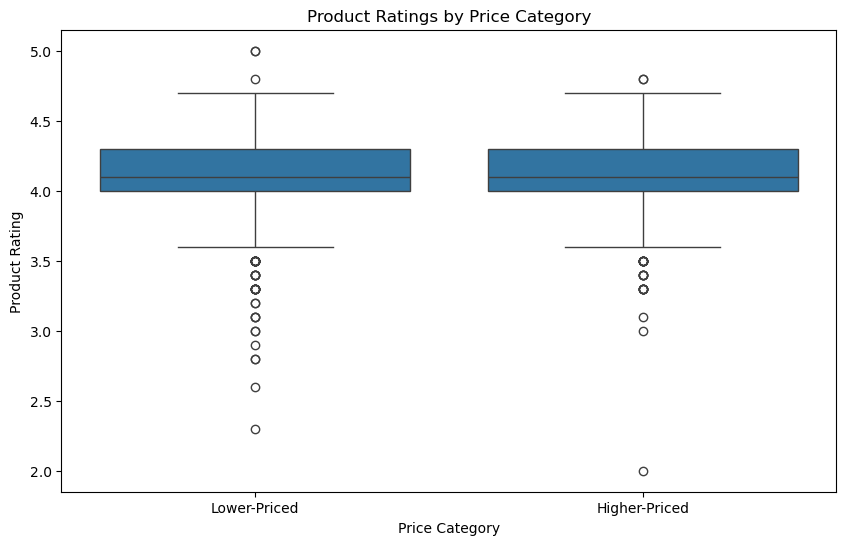

In [79]:
# Create a boxplot for ratings by price category
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_category', y='rating', data=split_category_df)
plt.title('Product Ratings by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Product Rating')
plt.show()

Higher-priced products tend to receive consistently good ratings with fewer very low ratings compared to lower-priced products, which exhibit more variability in ratings and have more instances of low ratings.

Median Rating remains the same in both price categories. It shows that customers generally rate products well regardless of price.

In [80]:
# Group by rating categories and calculate the correlation
grouped_by_rating = split_category_df.groupby('price_category').apply(
    lambda x: x['discounted_price'].corr(x['rating'])
)

print(grouped_by_rating)

price_category
Higher-Priced    0.161095
Lower-Priced     0.047617
dtype: float64


**Reasoning**: By this analysis, we can identify the top 10 director who have consistently produced high-revenue movies.

**Summary**: The bar chart shows the tio 10 directos with highest mean revenue, indicating their influence on movie revenue.

### Research Question 4:  Do Products with Positive Sentiment in Reviews Have Higher Ratings ?

**Analysis Decision 1**: Group by Sentiment and Calculate the Average Rating

In [81]:
# Group by sentiment and calculate the average rating
sentiment_rating = split_category_df.groupby('vader_sentiment')['rating'].mean().reset_index()
print(sentiment_rating)

  vader_sentiment    rating
0        Negative  3.881250
1         Neutral  3.900000
2        Positive  4.109413


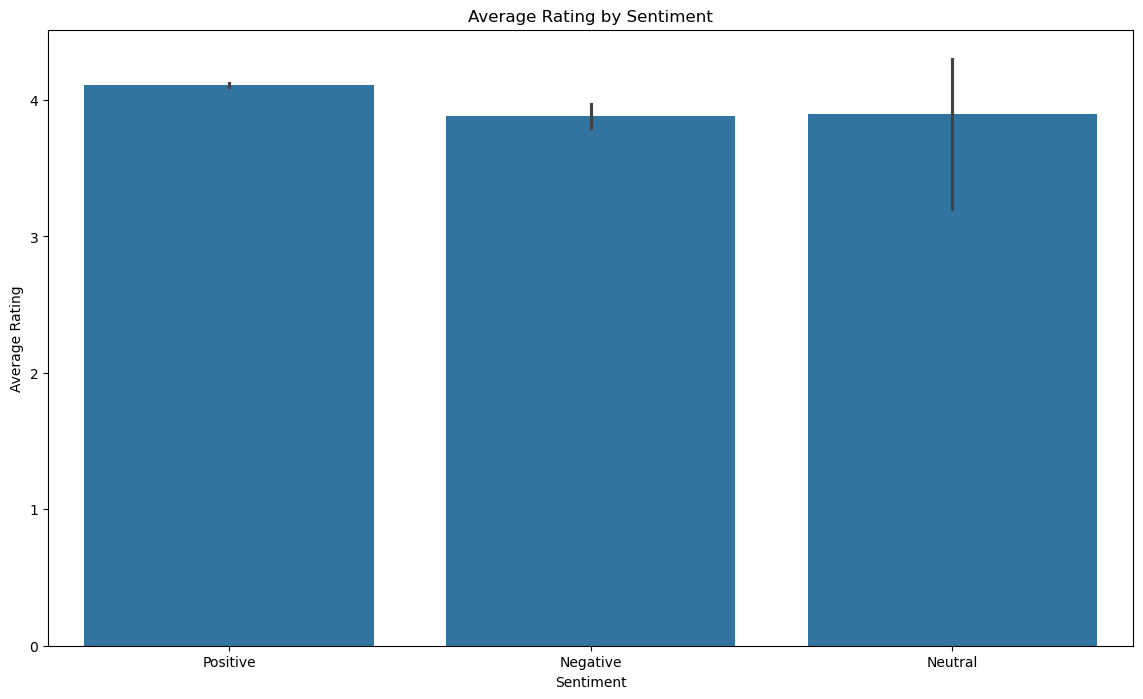

In [82]:
# Bar plot for average rating by sentiment
plt.figure(figsize=(14, 8))
sns.barplot(x='vader_sentiment', y='rating', data=split_category_df, estimator=np.mean)
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

As the bar graph shows:
- Products receive more positive reviews will also receive higher ratings.
- Both neutral and negative sentiment products have fairly close average ratings, though slightly lower than positive ones.
- This shows that neutral viewers aren't significantly driving up ratings, and negative feedback doesn't drastically reduce their rating either.

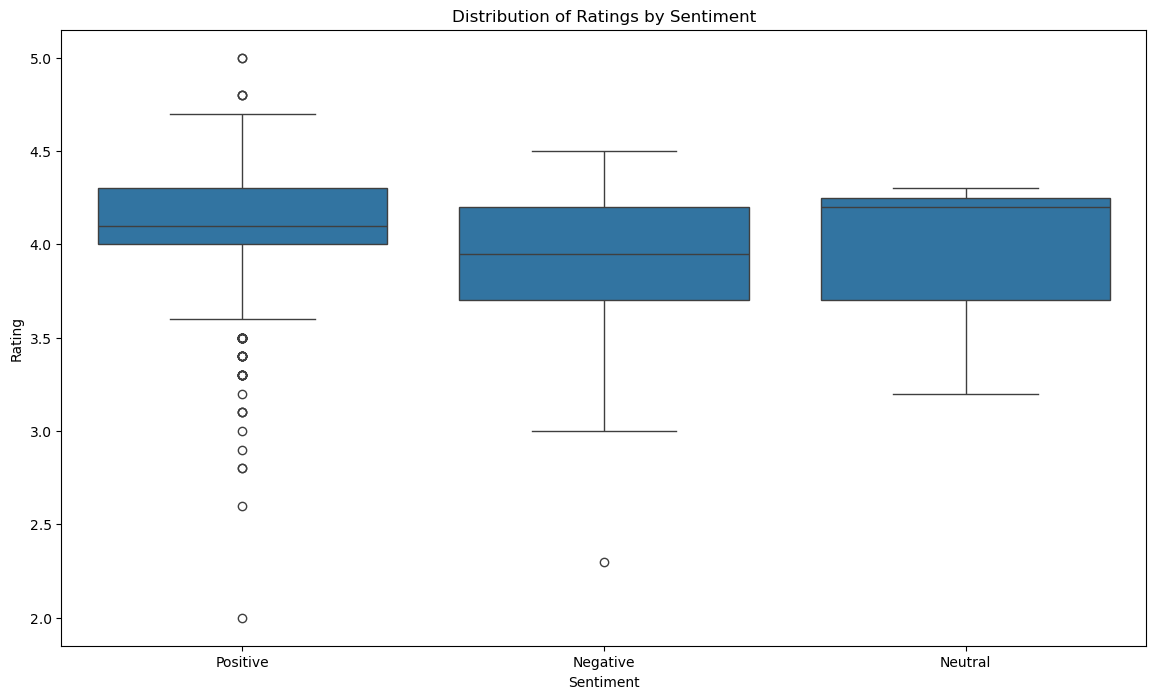

In [83]:
# Box plot to show the distribution of ratings by sentiment
plt.figure(figsize=(14, 8))
sns.boxplot(x='vader_sentiment', y='rating', data=split_category_df)
plt.title('Distribution of Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

- Products with positive sentiment tend to have higher ratings, but there are still some lower-rated products with positive sentiment reviews.
- Products with negative sentiment have a wider distribution of ratings, including some very low ratings, though the median is still relatively high.
- The neutral sentiment group has a consistent range of ratings, without extreme highs or lows.

In [84]:
correlation = split_category_df['vader_sentiment_score'].corr(split_category_df['rating'])
print(f"Correlation between sentiment score and rating: {correlation}")

Correlation between sentiment score and rating: 0.23757429505958585


**Reasoning**:

**Summary**: 
- Since the correlation is positive, it means that as the sentiment score increases (i.e., reviews become more positive), the product rating tends to increase as well. However, the correlation is relatively weak.
- A correlation of 0.238 suggests that while there is a relationship between sentiment and rating, it is not very strong. This means other factors may also be influencing the product ratings apart from sentiment. It's possible that even with positive sentiment, product quality, expectations, or other factors might moderate the final rating a customer leaves.

**Analysis decision **: Statistical Test: ANOVA

In [85]:
positive = split_category_df[split_category_df['vader_sentiment'] == 'Positive']['rating']
negative = split_category_df[split_category_df['vader_sentiment'] == 'Negative']['rating']
neutral = split_category_df[split_category_df['vader_sentiment'] == 'Neutral']['rating']

# Perform one-way ANOVA
anova_result = stats.f_oneway(positive, negative, neutral)
print(f"ANOVA result: {anova_result}")

ANOVA result: F_onewayResult(statistic=24.996069452954682, pvalue=2.1180786044781994e-11)


1. F-statistic (24.996):

- The F-statistic measures the variance between the groups (Positive, Negative, Neutral sentiments) compared to the variance within the groups.
- A higher F-statistic suggests that the variance between groups is significantly larger than the variance within groups, indicating that the differences in the groups are meaningful.
2. p-value (2.12e-11):

- The p-value is extremely small, much lower than the commonly used significance threshold of 0.05.
- This very low p-value indicates that the differences in ratings across the sentiment categories (Positive, Negative, and Neutral) are statistically significant.
- Therefore, we reject the null hypothesis, which states that there is no difference in ratings based on sentiment. There is a significant difference in product ratings based on the sentiment expressed in the reviews.

### Research Question 5: Which Categories of Products Receive the Highest or Lowest Ratings ?

In [86]:
split_category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   product_id                1464 non-null   object  
 1   product_name              1464 non-null   object  
 2   discounted_price          1464 non-null   float64 
 3   actual_price              1464 non-null   float64 
 4   discount_percentage       1464 non-null   float64 
 5   rating                    1464 non-null   float64 
 6   rating_count              1464 non-null   float64 
 7   about_product             1464 non-null   object  
 8   review_id                 1464 non-null   object  
 9   review_title              1464 non-null   object  
 10  review_content            1464 non-null   object  
 11  product_link              1464 non-null   object  
 12  category                  1464 non-null   object  
 13  product_type              1464 non-null   object

In [88]:
split_category_df.category.unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

Group by category_1

In [89]:
# Group by category_1 and calculate the mean rating
category_rating = split_category_df.groupby('category')['rating'].mean().reset_index()

# Sort by rating to see highest and lowest
category_rating = category_rating.sort_values(by='rating', ascending=False)
print(category_rating)

                category    rating
7         OfficeProducts  4.309677
8             Toys&Games  4.300000
5        HomeImprovement  4.250000
1  Computers&Accessories  4.155310
2            Electronics  4.081749
4           Home&Kitchen  4.040402
3    Health&PersonalCare  4.000000
6     MusicalInstruments  3.900000
0          Car&Motorbike  3.800000


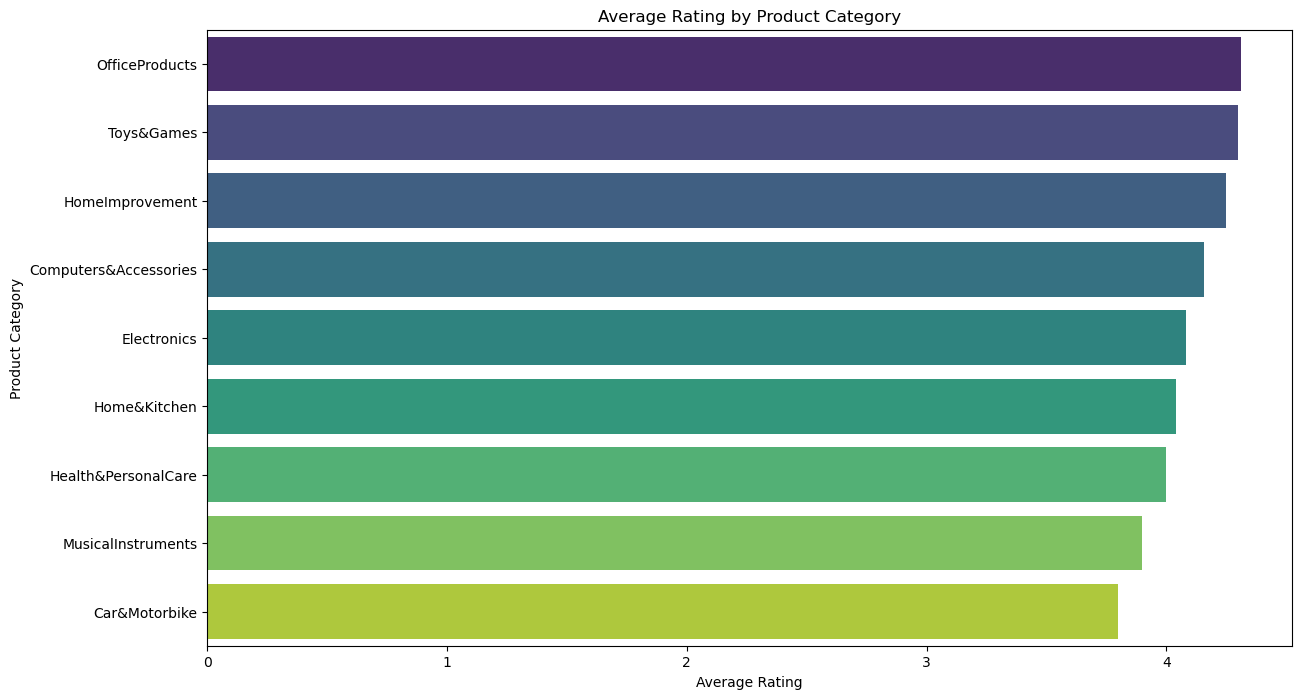

In [90]:
# Bar plot of average ratings by product category
plt.figure(figsize=(14, 8))
sns.barplot(x='rating', y='category', data=category_rating, hue='category', palette='viridis', dodge=False, legend=False)
plt.title('Average Rating by Product Category')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()

- Office Products have the highest average rating, indicating that customers are most satisfied with products in this category.

- Toys & Games and Home Improvement are also rated highly, suggesting that these product types generally meet customer expectations.

- Computers & Accessories and Electronics are in the mid-tier for average ratings, which is expected given the complexity and variability in performance for these types of products.

- Car & Motorbike products have the lowest average rating compared to the other categories, which may suggest potential issues with quality, customer satisfaction, or unmet expectations in this category.

In [91]:
# Function to get summary information for specified categorical columns
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({
        col_name: dataframe[col_name].value_counts(),  # Count of unique values
        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)  # Percentage of each unique value
    }))
    print("------------------------------------------------------------------")



In [92]:
cat_summary(split_category_df, 'category')

                       category      Ratio
Electronics                 526  35.928962
Computers&Accessories       452  30.874317
Home&Kitchen                448  30.601093
OfficeProducts               31   2.117486
MusicalInstruments            2   0.136612
HomeImprovement               2   0.136612
Toys&Games                    1   0.068306
Car&Motorbike                 1   0.068306
Health&PersonalCare           1   0.068306
------------------------------------------------------------------


In [96]:
split_category_df.groupby(['category','mean_of_ratings']).head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,...,category,product_type,textblob_sentiment_score,text_blob_sentiment,vader_sentiment_score,vader_sentiment,discount_bin,mean_of_ratings,rating_count_group,price_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",...,Computers&Accessories,USBCables,0.481944,Positive,0.9033,Positive,60-70%,Excellent,10000-50000,Lower-Priced
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",...,Computers&Accessories,USBCables,0.274318,Positive,0.9853,Positive,40-50%,Good,10000-50000,Lower-Priced
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...",...,Computers&Accessories,USBCables,0.600000,Positive,0.6808,Positive,80-90%,Good,5000-10000,Lower-Priced
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",...,Computers&Accessories,USBCables,0.240370,Positive,0.8316,Positive,50-60%,Excellent,50000-100000,Lower-Priced
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...",...,Computers&Accessories,USBCables,0.262740,Positive,0.9809,Positive,60-70%,Excellent,10000-50000,Lower-Priced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,B07BKSSDR2,Dr Trust Electronic Kitchen Digital Scale Weig...,899.0,1900.0,0.53,4.0,3663.0,Tare function: It comes with tare function whi...,"R3KLZUQCUHHOAX,R2QQZX4QI5G707,R2PMOA0FRZQJH8,R...","Design Optimised for Functionality, Durability...",...,Health&PersonalCare,DigitalBathroomScales,0.161032,Positive,0.9650,Positive,50-60%,Good,1000-5000,Higher-Priced
1286,B0BNDGL26T,MR. BRAND Portable USB Juicer Electric USB Jui...,499.0,2199.0,0.77,2.8,109.0,Portable & Convenient to Charge: This little b...,"RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...","Portable but not much powerful,not so good. po...",...,Home&Kitchen,JuicerMixerGrinders,0.144655,Positive,0.9117,Positive,70-80%,Low,100-1000,Lower-Priced
1309,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,1299.0,2495.0,0.48,2.0,2.0,Khaitan Orfin Fan heater for Home and kitchen|...,"R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",...,Home&Kitchen,FanHeaters,0.755000,Positive,0.7902,Positive,40-50%,Low,0-100,Higher-Priced
1315,B08YK7BBD2,"Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer...",429.0,999.0,0.57,3.0,617.0,"【Easy to Use】After installing the battery, you...","R24VRMVVKTZXZU,R2SZR29UV8HPIJ,R34NPCR94RTTCU,R...","Not worth the hype,Gud,Really useful 😃,Product...",...,Home&Kitchen,VacuumSealers,0.106762,Positive,-0.1573,Negative,50-60%,Low,100-1000,Lower-Priced


In [98]:
# Group by rating categories and calculate the correlation
grouped_by_rating_cat = split_category_df.groupby(['category','mean_of_ratings']).apply(
    lambda x: x['discount_percentage'].corr(x['rating'])
)

print(grouped_by_rating_cat)

category               mean_of_ratings
Car&Motorbike          Good                    NaN
Computers&Accessories  Average           -0.209750
                       Good               0.164417
                       Excellent         -0.231080
Electronics            Low               -0.842989
                       Average           -0.052182
                       Good              -0.217358
                       Excellent          0.022300
Health&PersonalCare    Good                    NaN
Home&Kitchen           Low                0.594894
                       Average           -0.108601
                       Good              -0.157715
                       Excellent          0.019532
HomeImprovement        Good                    NaN
                       Excellent               NaN
MusicalInstruments     Good               1.000000
OfficeProducts         Good                    NaN
                       Excellent         -0.135203
Toys&Games             Excellent           

/home/haucongle/miniconda3/envs/amazon_products/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/haucongle/miniconda3/envs/amazon_products/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


**Reasoning**: This analysis will help us know whether more popular movies generate higher revenues.

**Summary**: Based on the scatter plot and the calculated correlation number result (0.6154980131970922), it shows the positive correlation between popularity and revenues, indicating that more popular movies tend to have higher revenues.

**Analysis Decision 8**:Adjusted Revenue vs Revenue

In [ ]:
# Create a scatter plot to compare adjusted revenue and revenue
plt.figure(figsize=(14, 8))
plt.scatter(df_revenue['revenue_adj'], df_revenue['revenue'], alpha=0.5, color='b')
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xlabel('Adjusted Revenue')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
#Calculate the correlation number between Revenue_adj and Revenue
df_revenue['revenue_adj'].corr(df_revenue['revenue'])

**Reasoning**: This analysis will help us understang the relationship between Adjusted Revenue and Revenue

**Summary**: Based on the scatter plot and the calculated correlation number result (0.9008743936142234), it shows the pretty strong positive correlation between revenue_adj and revenues, indicating that adjusted revenues are reliable measure.

**Analysis Decision 9**: Vote Count vs Revenue

In [ ]:
# Create a scatter plot to compare vote count and revenue
plt.figure(figsize=(14, 8))
plt.scatter(df_revenue['vote_count'], df_revenue['revenue'], alpha=0.5, color='b')
plt.title('Correlation between Vote Count and Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
#Calculate the correlation number between vote_count and Revenue
df_revenue['vote_count'].corr(df_revenue['revenue'])

**Reasoning**: This scatter plot will help us understand whether higher audience engagement leads to higher revenues

**Summary**: Based on the scatter plot and the calculated correlation number result (0.7545462177826207), it shows the  positive correlation between vote count and revenues, suggesting that movies with more votes tend to have higher revenues.

**Analysis Decision 10**: Runtime vs Revenue

In [ ]:
# Create a scatter plot to compare runtime and revenue
plt.figure(figsize=(14, 8))
plt.scatter(df_revenue['runtime'], df_revenue['revenue'], alpha=0.5, color='b')
plt.title('Correlation between Vote Count and Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the correlation number between runtime and Revenue
df_revenue['runtime'].corr(df_revenue['revenue'])

**Reasoning**: This analysis helps us understand if longer or shorter movies generate higher revenues.

**Summary**: Based on the scatter plot and the calculated correlation number result (0.2507777788697942), it shows the weak positive correlation between vote count and revenues, suggesting that movie length has a limited impact on revenue.

**Analysis Decision 11**: Average Revenue over time:

In [ ]:
#Groupby the release year and then calculate the average revenue for each year.
revenue_release_year = df_revenue.groupby('release_year').revenue.mean().reset_index()

In [ ]:
# Use bar graph to visualize average revenue over time.
plt.figure(figsize=(14, 8))
plt.bar(revenue_release_year['release_year'], revenue_release_year['revenue'])
plt.xlabel('Release Year')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue over Years')
plt.show()

**Reasoning**: the calculation of average revenue for each year will show how movie revenues changed over time.

**Summary**: This bar chart shows the average revenue trend over time, we can see the movie's revenue is increasing year by year.

# <a id='conclusions'></a>
## Conclusions


Question 1:  Is there a relationship between discount percentage and average product rating ?
- There is a weak negative correlation, the distribution of ratings shows that most products are clusterd around the "good" rating, regardless of the discount
- Thus, we cannot confidently say that higher or lower discounts strongly influence average product ratings.
- the impact of discounts on ratings is minimal.

Question 2: What kinds of properties are associated with movies that have high revenue ?
- The distribution of movie revenues is right-skewed, so the majority of movies have low revenue.
- Some directors produce films with higher average revenues. Recognition of these directors can ensure financial strategy.
- “Adventure” and “Fantasy” are associated with higher sales. Investing in these genres can be worthwhile.
- Budget: The correlation between budget and revenue is positive. So, movies with higher budget will generate higher revenues.
- Popularity: The correlation between popularity and revenue is positive. So, the movies that are more popular with audiences will have higher revenues.
- Adjusted Revenue: The correlation between adjusted revenue and revenue is the strongest positive (~0.9), which is shows that there is a strong relationship between the two. Adjusted revenue provides a more accurate reflection of financial success over time, accounting for inflation.
- Vote Count: The correlation between vote count and revenue is also high positive. It shows that the movie with higher number of votes tend to have higher revenues.
- Runtime: The correlaton of runtime is also positive, but it is weak (~0.2). It shows that longer or shorter movie does not impact the revenue.
- In general, audience is the main factor affecting revenue.

<a id='limit'></a>
## Limitation

- This source might not represent a comprehensive and unbiased sample of all movies. It is possible that some genres of movies are not represented.
- The correlation does not imply causation. It will need more experiments and statistical analyses. The findings in this analysis provide associations but should not be interpreted as causal relationships.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])